In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [3]:
# Download the giger shape files from: https://www2.census.gov/geo/tiger/TIGER2020PL/LAYER/TABBLOCK/2020/
# You can then reverse geocode the centroids from: https://www.geoapify.com/tools/reverse-geocoding-online

In [4]:
alabama = gpd.read_file('../data/shapefiles/tl_2020_01_tabblock20.zip')
alabama

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,HOUSING20,POP20,geometry
0,01,133,965700,3025,011339657003025,Block 3025,G5040,R,NaN,NaN,S,27642,0,+34.2430014,-087.6271966,5,15,"POLYGON ((-87.62818 34.24378, -87.62790 34.243..."
1,01,015,001600,1026,010150016001026,Block 1026,G5040,U,02629,U,S,124157,0,+33.7081655,-085.8594188,10,20,"POLYGON ((-85.86498 33.71246, -85.86495 33.712..."
2,01,015,001101,2065,010150011012065,Block 2065,G5040,R,NaN,NaN,S,242040,0,+33.5832632,-085.7919734,3,17,"POLYGON ((-85.79456 33.58557, -85.79437 33.585..."
3,01,015,002502,1053,010150025021053,Block 1053,G5040,R,NaN,NaN,S,40222,0,+33.8556542,-085.9163828,1,2,"POLYGON ((-85.91755 33.85641, -85.91734 33.856..."
4,01,033,020300,3003,010330203003003,Block 3003,G5040,U,29953,U,S,22668,0,+34.7611216,-087.7092484,36,68,"POLYGON ((-87.71026 34.76094, -87.71001 34.761..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185971,01,097,006104,2004,010970061042004,Block 2004,G5040,R,NaN,NaN,S,5373820,35548,+30.8649417,-088.1609083,25,47,"POLYGON ((-88.17854 30.85847, -88.17749 30.859..."
185972,01,051,030101,2034,010510301012034,Block 2034,G5040,R,NaN,NaN,S,187610,2093,+32.7054574,-086.3948957,2,10,"POLYGON ((-86.39667 32.71061, -86.39659 32.711..."
185973,01,051,030300,2008,010510303002008,Block 2008,G5040,R,NaN,NaN,S,122882,43517,+32.7526750,-085.9055665,17,11,"POLYGON ((-85.90854 32.75463, -85.90703 32.754..."
185974,01,047,957000,1028,010479570001028,Block 1028,G5040,R,NaN,NaN,S,9601051,45562,+32.4147650,-087.4023216,2,0,"POLYGON ((-87.42235 32.40840, -87.42234 32.414..."


In [5]:
alabama['centroid'] = alabama['geometry'].centroid

/var/folders/31/_flrh_251y578sg72lx1yb780000gn/T/ipykernel_75941/1200650393.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  alabama['centroid'] = alabama['geometry'].centroid


In [6]:
alabama['county_id'] = alabama['STATEFP20'] + alabama['COUNTYFP20']
al = alabama[alabama['county_id'] == '01073'] # Birmingham is in Jefferson County
al

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,HOUSING20,POP20,geometry,centroid,county_id
162,01,073,011210,1060,010730112101060,Block 1060,G5040,U,07786,U,S,203568,0,+33.6634300,-086.6908283,88,216,"POLYGON ((-86.70033 33.66577, -86.70033 33.665...",POINT (-86.69310 33.66422),01073
163,01,073,011205,1067,010730112051067,Block 1067,G5040,U,07786,U,S,193805,0,+33.6839540,-086.6861249,29,51,"POLYGON ((-86.69024 33.68323, -86.68986 33.684...",POINT (-86.68612 33.68395),01073
164,01,073,011304,1006,010730113041006,Block 1006,G5040,R,NaN,NaN,S,9232,0,+33.7620649,-086.7844527,4,1,"POLYGON ((-86.78561 33.76202, -86.78481 33.762...",POINT (-86.78445 33.76206),01073
165,01,073,005910,2010,010730059102010,Block 2010,G5040,U,07786,U,S,5071,0,+33.6400119,-086.7041945,0,0,"POLYGON ((-86.70449 33.63981, -86.70436 33.640...",POINT (-86.70419 33.64001),01073
166,01,073,010604,5023,010730106045023,Block 5023,G5040,U,07786,U,S,5444,0,+33.4788236,-086.9110512,5,8,"POLYGON ((-86.91159 33.47908, -86.91050 33.479...",POINT (-86.91105 33.47882),01073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185831,01,073,011004,1037,010730110041037,Block 1037,G5040,R,NaN,NaN,S,58187,0,+33.5235283,-086.5497686,0,0,"POLYGON ((-86.55197 33.52199, -86.55189 33.522...",POINT (-86.54977 33.52353),01073
185840,01,073,012910,1000,010730129101000,Block 1000,G5040,U,07786,U,S,3878,566,+33.4325789,-086.7141356,0,0,"POLYGON ((-86.71488 33.43314, -86.71433 33.432...",POINT (-86.71402 33.43251),01073
185952,01,073,005500,2028,010730055002028,Block 2028,G5040,U,07786,U,S,133013,0,+33.5763289,-086.7913023,0,0,"POLYGON ((-86.79381 33.57535, -86.79350 33.575...",POINT (-86.79130 33.57633),01073
185953,01,073,011116,2031,010730111162031,Block 2031,G5040,R,NaN,NaN,S,0,5677,+33.6950588,-086.5851913,0,0,"POLYGON ((-86.58538 33.69504, -86.58535 33.695...",POINT (-86.58519 33.69506),01073


In [7]:
len(al['GEOID20'].unique())

24469

# Spatial join

In [8]:
# import corelogic + fcc referenced addresses
core_df = pd.read_csv('../data/temp/01073_points_address.csv')
core_df

,street,lon,lat
0,"1129 ASHBURY SQ, BIRMINGHAM, AL, 35216",-86.791181,33.398963
1,"1116 ASHBURY SQ, BIRMINGHAM, AL, 35216",-86.791248,33.399006
2,"1012 9TH AVE, PLEASANT GROVE, AL, 35127",-86.979252,33.484311
3,"2244 CHAPEL HILL RD, BIRMINGHAM, AL, 35216",-86.791822,33.401158
4,"1009 9TH ST, PLEASANT GROVE, AL, 35127",-86.980424,33.487290
...,...,...,...
169542,"2615 AVE F, BIRMINGHAM, AL, 35218",-86.900774,33.506200
169543,"3004 AVE D, BIRMINGHAM, AL, 35218",-86.905296,33.504401
169544,"3116 AVE C, BIRMINGHAM, AL, 35218",-86.907036,33.504030
169545,"2822 AVE F, BIRMINGHAM, AL, 35218",-86.901921,33.504760


In [9]:
cgdf = gpd.GeoDataFrame(core_df, geometry=gpd.points_from_xy(core_df.lon, core_df.lat))
cgdf

,street,lon,lat,geometry
0,"1129 ASHBURY SQ, BIRMINGHAM, AL, 35216",-86.791181,33.398963,POINT (-86.79118 33.39896)
1,"1116 ASHBURY SQ, BIRMINGHAM, AL, 35216",-86.791248,33.399006,POINT (-86.79125 33.39901)
2,"1012 9TH AVE, PLEASANT GROVE, AL, 35127",-86.979252,33.484311,POINT (-86.97925 33.48431)
3,"2244 CHAPEL HILL RD, BIRMINGHAM, AL, 35216",-86.791822,33.401158,POINT (-86.79182 33.40116)
4,"1009 9TH ST, PLEASANT GROVE, AL, 35127",-86.980424,33.487290,POINT (-86.98042 33.48729)
...,...,...,...,...
169542,"2615 AVE F, BIRMINGHAM, AL, 35218",-86.900774,33.506200,POINT (-86.90077 33.50620)
169543,"3004 AVE D, BIRMINGHAM, AL, 35218",-86.905296,33.504401,POINT (-86.90530 33.50440)
169544,"3116 AVE C, BIRMINGHAM, AL, 35218",-86.907036,33.504030,POINT (-86.90704 33.50403)
169545,"2822 AVE F, BIRMINGHAM, AL, 35218",-86.901921,33.504760,POINT (-86.90192 33.50476)


In [10]:
# Spatial join the address with points and the jeffesron county blocks with polygons

jefferson_county_fips = al.sjoin(cgdf, how='inner',predicate='intersects')
jefferson_county_fips = jefferson_county_fips[['street','GEOID20','lon', 'lat', 'geometry', 'centroid']]
jefferson_county_fips = jefferson_county_fips.rename(columns={'GEOID20': 'geoid20'})

jefferson_county_fips

/Users/loremipsum/Documents/GitHub/sdc.broadband_dev/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:2061: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: None

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


,street,geoid20,lon,lat,geometry,centroid
162,"462 WESTCHESTER DR, CENTER POINT, AL, 35215",010730112101060,-86.697664,33.663265,"POLYGON ((-86.70033 33.66577, -86.70033 33.665...",POINT (-86.69310 33.66422)
162,"466 WESTCHESTER DR, CENTER POINT, AL, 35215",010730112101060,-86.697936,33.663323,"POLYGON ((-86.70033 33.66577, -86.70033 33.665...",POINT (-86.69310 33.66422)
162,"470 WESTCHESTER DR, CENTER POINT, AL, 35215",010730112101060,-86.698211,33.663365,"POLYGON ((-86.70033 33.66577, -86.70033 33.665...",POINT (-86.69310 33.66422)
162,"3005 CARLETON RD, CENTER POINT, AL, 35215",010730112101060,-86.693514,33.662588,"POLYGON ((-86.70033 33.66577, -86.70033 33.665...",POINT (-86.69310 33.66422)
162,"3011 CARLETON RD, CENTER POINT, AL, 35215",010730112101060,-86.693920,33.662836,"POLYGON ((-86.70033 33.66577, -86.70033 33.665...",POINT (-86.69310 33.66422)
...,...,...,...,...,...,...
185767,"400 EUCLID AVE, BIRMINGHAM, AL, 35213",010730108011021,-86.753355,33.506194,"POLYGON ((-86.75382 33.50650, -86.75340 33.506...",POINT (-86.75318 33.50666)
185767,"402 EUCLID AVE, BIRMINGHAM, AL, 35213",010730108011021,-86.753339,33.506206,"POLYGON ((-86.75382 33.50650, -86.75340 33.506...",POINT (-86.75318 33.50666)
185767,"410 EUCLID AVE, BIRMINGHAM, AL, 35213",010730108011021,-86.753279,33.506253,"POLYGON ((-86.75382 33.50650, -86.75340 33.506...",POINT (-86.75318 33.50666)
185767,"412 EUCLID AVE, BIRMINGHAM, AL, 35213",010730108011021,-86.753264,33.506265,"POLYGON ((-86.75382 33.50650, -86.75340 33.506...",POINT (-86.75318 33.50666)


In [11]:
len(jefferson_county_fips['geoid20'].unique())

15315

In [12]:
len(al['GEOID20'].unique()) - len(jefferson_county_fips['geoid20'].unique())

9154

# Get one address per block

In [13]:
one_per_block= jefferson_county_fips.groupby('geoid20').apply(lambda x: x.sample(1)).reset_index(drop=True)  # randomly get one per county
one_per_block

,street,geoid20,lon,lat,geometry,centroid
0,"9256 PARKWAY E, BIRMINGHAM, AL, 35206",010730001001000,-86.700589,33.587030,"POLYGON ((-86.70200 33.58796, -86.70179 33.588...",POINT (-86.69980 33.58945)
1,"9002 PARKWAY E, BIRMINGHAM, AL, 35206",010730001001002,-86.716150,33.577447,"POLYGON ((-86.71861 33.57796, -86.71629 33.578...",POINT (-86.70932 33.58529)
2,"9001 ROEBUCK BLVD, BIRMINGHAM, AL, 35206",010730001001003,-86.708240,33.583977,"POLYGON ((-86.71117 33.58116, -86.71110 33.581...",POINT (-86.70889 33.58297)
3,"116 94TH ST N, BIRMINGHAM, AL, 35206",010730001001004,-86.715152,33.588869,"POLYGON ((-86.71928 33.58164, -86.71915 33.582...",POINT (-86.71477 33.58580)
4,"101 94TH ST N, BIRMINGHAM, AL, 35206",010730001001005,-86.714927,33.588854,"POLYGON ((-86.71652 33.58863, -86.71644 33.588...",POINT (-86.71564 33.58861)
...,...,...,...,...,...,...
15310,"5234 COTTAGE LN, BIRMINGHAM, AL, 35226",010730144152012,-86.869407,33.362234,"POLYGON ((-86.86964 33.36176, -86.86957 33.361...",POINT (-86.86931 33.36211)
15311,"5302 COTTAGE LN, BIRMINGHAM, AL, 35226",010730144152015,-86.870224,33.360721,"POLYGON ((-86.87211 33.35684, -86.87206 33.356...",POINT (-86.87085 33.35876)
15312,"129 COBBLESTONE LN, BIRMINGHAM, AL, 35244",010730144152017,-86.873603,33.349815,"POLYGON ((-86.87791 33.34821, -86.87788 33.348...",POINT (-86.87429 33.34822)
15313,"124 COBBLESTONE LN, BIRMINGHAM, AL, 35244",010730144152018,-86.873539,33.349793,"POLYGON ((-86.87389 33.35060, -86.87385 33.350...",POINT (-86.87332 33.35043)


In [18]:
one_per_block =one_per_block.rename(columns={'street':'address'})
one_per_block

,address,geoid20,lon,lat,geometry,centroid
0,"9256 PARKWAY E, BIRMINGHAM, AL, 35206",010730001001000,-86.700589,33.587030,"POLYGON ((-86.70200 33.58796, -86.70179 33.588...",POINT (-86.69980 33.58945)
1,"9002 PARKWAY E, BIRMINGHAM, AL, 35206",010730001001002,-86.716150,33.577447,"POLYGON ((-86.71861 33.57796, -86.71629 33.578...",POINT (-86.70932 33.58529)
2,"9001 ROEBUCK BLVD, BIRMINGHAM, AL, 35206",010730001001003,-86.708240,33.583977,"POLYGON ((-86.71117 33.58116, -86.71110 33.581...",POINT (-86.70889 33.58297)
3,"116 94TH ST N, BIRMINGHAM, AL, 35206",010730001001004,-86.715152,33.588869,"POLYGON ((-86.71928 33.58164, -86.71915 33.582...",POINT (-86.71477 33.58580)
4,"101 94TH ST N, BIRMINGHAM, AL, 35206",010730001001005,-86.714927,33.588854,"POLYGON ((-86.71652 33.58863, -86.71644 33.588...",POINT (-86.71564 33.58861)
...,...,...,...,...,...,...
15310,"5234 COTTAGE LN, BIRMINGHAM, AL, 35226",010730144152012,-86.869407,33.362234,"POLYGON ((-86.86964 33.36176, -86.86957 33.361...",POINT (-86.86931 33.36211)
15311,"5302 COTTAGE LN, BIRMINGHAM, AL, 35226",010730144152015,-86.870224,33.360721,"POLYGON ((-86.87211 33.35684, -86.87206 33.356...",POINT (-86.87085 33.35876)
15312,"129 COBBLESTONE LN, BIRMINGHAM, AL, 35244",010730144152017,-86.873603,33.349815,"POLYGON ((-86.87791 33.34821, -86.87788 33.348...",POINT (-86.87429 33.34822)
15313,"124 COBBLESTONE LN, BIRMINGHAM, AL, 35244",010730144152018,-86.873539,33.349793,"POLYGON ((-86.87389 33.35060, -86.87385 33.350...",POINT (-86.87332 33.35043)


In [19]:
one_per_block.to_csv('../data/01073_one_address_per_block.csv', index=False)

In [15]:
one_per_block = one_per_block.set_geometry('centroid')

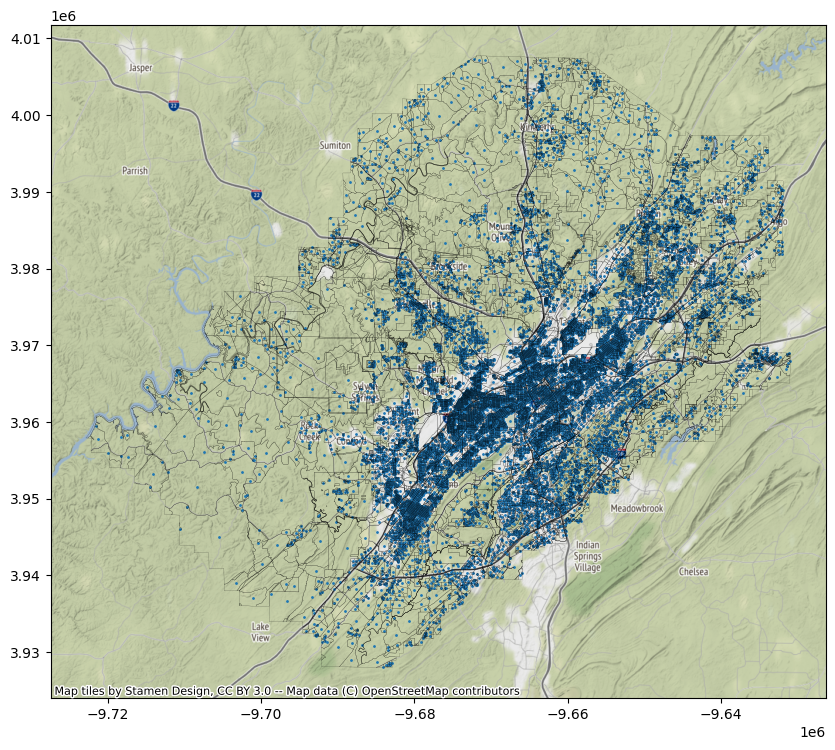

In [16]:
jcf_wm = one_per_block.to_crs(epsg=3857) 
jb_wm = al.to_crs(epsg=3857)
ax = jcf_wm.plot(figsize=(10, 10), alpha=1, markersize=1)
jb_wm.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.1) # add block outlines
cx.add_basemap(ax)